In [1]:
# import the required packages
import numpy as np
import pandas as pd 

# libraries for Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer

# libraries for TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# for Association Rule Mining
# for visualizations
import matplotlib.pyplot as plt

# Word Cloud
# pip install wordcloud
from wordcloud import WordCloud

# for market basket analysis
# conda install -c conda-forge mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
from mlxtend.preprocessing import TransactionEncoder

# for creating training sets
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.metrics import precision_recall_fscore_support as score
import time

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
dat = pd.read_csv('bbc-text.csv')

In [3]:
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [5]:
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
dat['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

### 1.2 Cleanse the Text Data

In [7]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("stopwords.txt")

text_all = dat['text'].apply(lambda x:pre_process(x))

In [8]:
text_all[0]

'tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us s tivo and the uk s sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which a

In [9]:
text_all.shape

(2225,)

### 1.3 Bag-of-Word

In [10]:
#create a vocabulary of words, 
#ignore words that appear in 15% of documents, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.15, stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_all.tolist())

In [11]:
text_counts.shape

(2225, 5000)

In [12]:
count_vect.stop_words_

{'workstations',
 'moderating',
 'darker',
 'mcdowell',
 'bleakly',
 'fares',
 'amadeo',
 'homeowners',
 'jal',
 'smes',
 'shoes',
 'strangely',
 'constituencies',
 'albacete',
 'legions',
 'owusu',
 'walkman',
 'tymoshenko',
 'cartel',
 'freshwater',
 'mediocrity',
 'stokes',
 'ipc',
 'fidelis',
 'waged',
 'levine',
 'exclusions',
 'secretarial',
 'mukerjee',
 'sensibility',
 'strokosch',
 'limbs',
 'bogus',
 'authoritarian',
 'tripled',
 'alerted',
 'biochemistry',
 'bounty',
 'contepomi',
 'closures',
 'holborn',
 'wojahn',
 'superhero',
 'stalking',
 'warcraft',
 'casualty',
 'monfils',
 'cuff',
 'interfering',
 'bodleian',
 'communicating',
 'begging',
 'montreal',
 'hanif',
 'surviving',
 'commonly',
 'poisonous',
 'chronicles',
 'hiten',
 'leonard',
 'avery',
 'waasdorp',
 'alcorn',
 'nimble',
 'curb',
 'extracting',
 'nichols',
 'sic',
 'endeavour',
 'lobbying',
 'totalitarianism',
 'cvrd',
 'rampant',
 'clapping',
 'peterhead',
 'evacuate',
 'establishing',
 'authorise',
 'com

In [13]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [14]:
print('The highest frequency words:')
words_freq[0:20] # Top 20 words used in the texts

The highest frequency words:


[('bn', 958),
 ('film', 890),
 ('music', 839),
 ('labour', 804),
 ('election', 662),
 ('party', 630),
 ('games', 622),
 ('england', 618),
 ('blair', 603),
 ('technology', 561),
 ('minister', 561),
 ('public', 557),
 ('mobile', 546),
 ('british', 542),
 ('tv', 525),
 ('european', 525),
 ('players', 524),
 ('sales', 494),
 ('plans', 486),
 ('six', 484)]

In [15]:
count_vect.get_feature_names()

['aaas',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abn',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'ac',
 'academy',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'acclaimed',
 'accompanied',
 'according',
 'account',
 'accounting',
 'accounts',
 'accurate',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acknowledged',
 'acquire',
 'acquisition',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actually',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'adapted',
 'add',
 'adding',
 'addition',
 'additional',
 'address',
 'addresses',
 'adds',
 'adjusted',
 'administration',
 'admit',
 'admits',
 'admitted',
 'adopt',
 'adopted',
 'adoption',
 'ads',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advertising',
 'adverts',


In [16]:
pd.DataFrame(text_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [17]:
# Generate TF-IDF matrix

tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [18]:
tfidf_transformer.idf_

array([6.62851999, 5.81758977, 6.22305488, ..., 5.87474819, 5.81758977,
       5.99991133])

In [19]:
tfidf_transformer.idf_.shape

(5000,)

In [20]:
feature_names=np.array(count_vect.get_feature_names())
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['six' 'according' 'public' 'month' 'day' 'bn' 'based' 'called' 'british'
 'minister' 'move' 'hit' 'international' 'don' 'director' 'help' 'despite'
 'london' 'half' 'plans' 'record' 'european' 'start' 'money' 'seen' 're'
 'players' 'spokesman' 'future' 'business' 'earlier' 'companies' 'britain'
 'run' 'able' 'saying' 'europe' 'biggest' 'times' 'due' 'taking' 'lost'
 'decision' 'team' 'national' 'recent' 'industry' 'england' 'deal' 'past'
 'film' 'life' 'service' 'found' 'final' 'lot' 'labour' 'january'
 'technology' 'music' 'days' 'executive' 'looking' 'look' 'following'
 'games' 'action' 'strong' 'major' 'growth' 'using' 'ahead' 'real'
 'believe' 'michael' 'line' 'currently' 'party' 'hard' 'little'
 'president' 'playing' 'december' 'held' 'election' 'services' 'played'
 'system' 'office' 'current' 'david' 'figures' 'left' 'firms' 've'
 'include' 'announced' 'john' 'cut' 'analysts']


In [21]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.091391,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['savvy' 'specifications' 'sadly' 'types' 'constantly' 'etc' 'status'
 'amongst' 'crimes' 'kinds' 'instant' 'changing' 'finnish' 'maintaining'
 'reaching' 'credibility' 'purpose' 'occasion' 'informed' 'katerina']
Features with highest tfidf: 
['cairn' 'stern' 'brando' 'wmc' 'viacom' 'mitsubishi' 'copper' 'edwards'
 'beer' 'boeing' 'qantas' 'mirza' 'fiat' 'mtv' 'mutu' 'dallaglio' 'uwb'
 'ink' 'commodore' 'ballet']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [23]:
idx=0

doc = text_all[idx]
tf_idf_vector=text_tfidf[idx]

print(doc)
print(tf_idf_vector)

tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us s tivo and the uk s sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which ar

In [24]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

,feature_number,tf_idf
14,4675,0.424744
137,1186,0.192551
5,4866,0.170310
39,3902,0.166653
140,983,0.158565
...,...,...
156,596,0.029971
48,3626,0.029416
103,2094,0.028765
154,615,0.028516


In [25]:
#Top 5 keywords
#use only topn items from vector
topn =5    
topn_items = temp[:topn]

tf_idf = []
word = []

for index, row in topn_items.iterrows():
    fname = feature_names[int(row['feature_number'])]
    word.append(fname)
    tf_idf.append(round(row['tf_idf'], 3)) 

print(doc, '\n')

result = dict(zip(word, tf_idf))
print(result)

tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us s tivo and the uk s sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which ar

In [26]:
topn = 5
results =[]

for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result)

# Add columns 'cleansed_text' and 'keywords'
dat['cleansed_text'] = text_all
dat['keywords'] = results
dat.head()


,category,text,cleansed_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"{'tv': 0.425, 'definition': 0.193, 'watch': 0...."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"{'worldcom': 0.534, 'ebbers': 0.49, 'accountin..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"{'farrell': 0.576, 'leicester': 0.261, 'tigers..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"{'league': 0.236, 'west': 0.197, 'cup': 0.174,..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"{'ocean': 0.469, 'sequel': 0.408, 'twelve': 0...."


In [27]:
dat.to_csv('bbc-text_export.csv')

### 2.2 Association Rules Mining on keywords

In [28]:
topn = 5
results =[]

for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = word
    
    results.append(result)

# Add columns 'cleansed_text' and 'keywords'
dat['cleansed_text'] = text_all
dat['keywords'] = results
dat.head()


,category,text,cleansed_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"[tv, definition, watch, satellite, content]"
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"[worldcom, ebbers, accounting, fraud, defence]"
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"[farrell, leicester, tigers, rugby, league]"
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"[league, west, cup, united, drawn]"
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"[ocean, sequel, twelve, starring, box]"


### 2.2.1 Tech

In [29]:
tech_dat = dat[dat['category']=='tech']
tech_dat2 = tech_dat.drop(['category', 'text', 'cleansed_text'], axis = 1)
tech_dat2 = tech_dat2.keywords.apply(pd.Series)

trans = []
for i in range(0, len(tech_dat2)):
    trans.append([str(tech_dat2.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

print(trans)

[['tv' 'definition' 'watch' 'satellite' 'content']
 ['argonaut' 'games' 'cash' 'london' 'save']
 ['fbi' 'mails' 'attachment' 'virus' 'computer']
 ...
 ['domains' 'icann' 'domain' 'names' 'travel']
 ['email' 'spam' 'systems' 'mail' 'mails']
 ['attacks' 'traffic' 'sites' 'net' 'data']]


In [30]:
full_list=pd.Series([])
for col in tech_dat2:
    full_list = full_list.append(tech_dat2[col].dropna())
y = full_list.value_counts().head(50).to_frame()
y.index

<ipython-input-30-94c890051b00>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


Index(['mobile', 'software', 'microsoft', 'games', 'phone', 'computer', 'tv',
       'music', 'technology', 'broadband', 'phones', 'net', 'apple', 'spam',
       'digital', 'sony', 'search', 'virus', 'security', 'mobiles', 'bt',
       'content', 'gaming', 'video', 'mail', 'users', 'programs', 'nintendo',
       'blogs', 'ds', 'spyware', 'networks', 'online', 'file', 'dvd', 'blog',
       'media', 'data', 'mails', 'sites', 'system', 'messages', 'peer',
       'google', 'gadget', 'site', 'service', 'xbox', 'network', 'dr'],
      dtype='object')

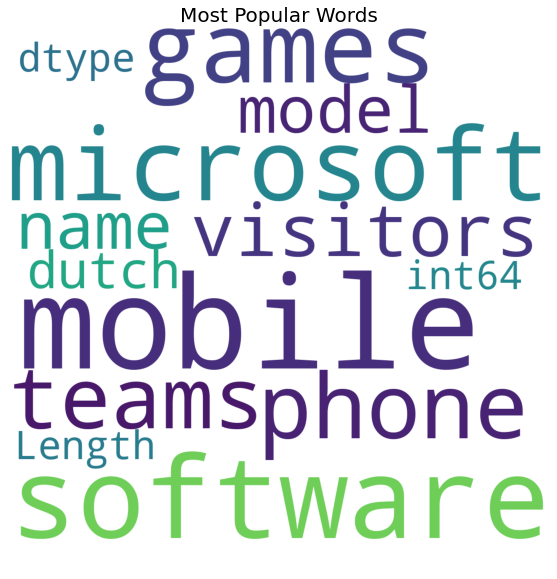

In [31]:
# WordCloud using keywords
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200).generate(str(full_list.value_counts()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

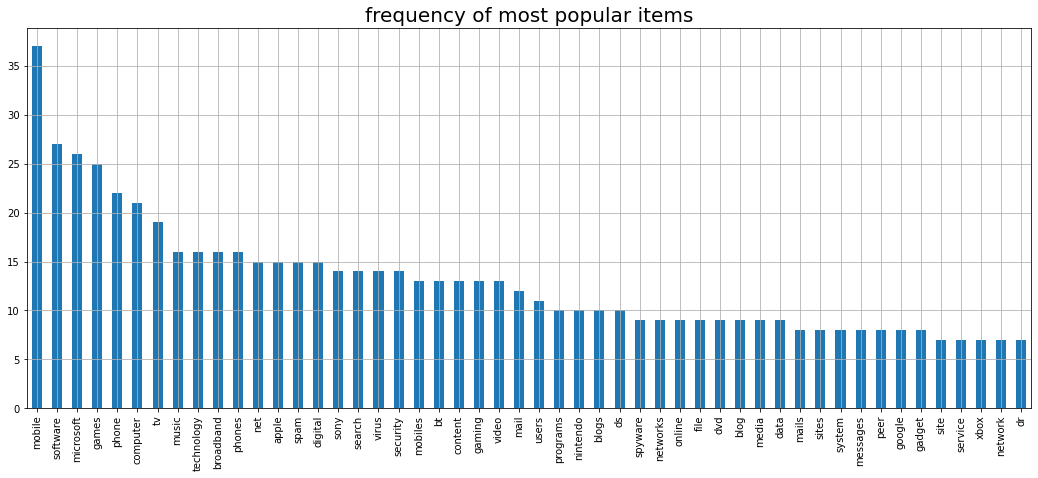

In [32]:
# looking at the frequency of most popular keywords 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [33]:
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded = data_encoded.loc[:, y.index]
data_encoded

,mobile,software,microsoft,games,phone,computer,tv,music,technology,broadband,...,system,messages,peer,google,gadget,site,service,xbox,network,dr
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
frequent_itemsets=apriori(data_encoded, min_support = 0.001, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.092269,(mobile)
1,0.067332,(software)
2,0.064838,(microsoft)
3,0.062344,(games)
4,0.054863,(phone)
...,...,...
378,0.002494,"(bt, tv, content, broadband)"
379,0.002494,"(search, video, google, tv)"
380,0.004988,"(file, networks, content, music)"
381,0.002494,"(programs, security, spyware, net)"


<AxesSubplot:>

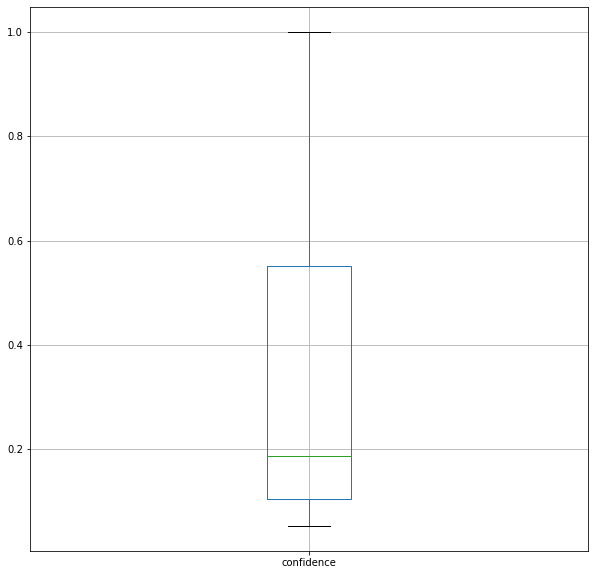

In [35]:
# confidence method
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c[['confidence']].boxplot()

<AxesSubplot:>

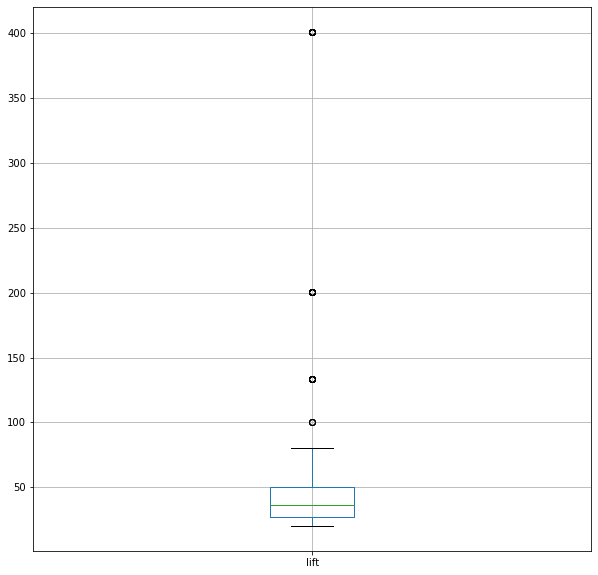

In [36]:
#Lift method
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=20)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l[['lift']].boxplot()

In [37]:
rules_c[ (rules_c['lift'] >= 400) &
       (rules_c['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1076,"(system, technology)","(network, software)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1077,"(system, network)","(technology, software)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1078,"(technology, software)","(system, network)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1079,"(network, software)","(system, technology)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1037,"(search, software)","(google, microsoft)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1038,"(google, microsoft)","(search, software)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1128,"(bt, tv)","(content, broadband)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1147,"(google, tv)","(search, video)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1133,"(content, broadband)","(bt, tv)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf
1145,"(video, google)","(search, tv)",0.002494,0.002494,0.002494,1.0,401.0,0.002488,inf


### 2.2.2 Sports

In [38]:
sport_dat = dat[dat['category']=='sport']
sport_dat2 = sport_dat.drop(['category', 'text', 'cleansed_text'], axis = 1)
sport_dat2 = sport_dat2.keywords.apply(pd.Series)

trans = []
for i in range(0, len(sport_dat2)):
    trans.append([str(sport_dat2.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

print(trans)

[['farrell' 'leicester' 'tigers' 'rugby' 'league']
 ['league' 'west' 'cup' 'united' 'drawn']
 ['henman' 'rain' 'seed' 'ljubicic' 'frustrating']
 ...
 ['manager' 'players' 'walter' 'managers' 'friendly']
 ['davies' 'ospreys' 'gloucester' 'wales' 'neath']
 ['souness' 'goal' 'uefa' 'cup' 'graeme']]


In [39]:
full_list=pd.Series([])
for col in tech_dat2:
    full_list = full_list.append(sport_dat2[col].dropna())
y = full_list.value_counts().head(50).to_frame()
y.index

<ipython-input-39-93e9176e994b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


Index(['england', 'chelsea', 'wales', 'ireland', 'rugby', 'cup', 'williams',
       'club', 'arsenal', 'liverpool', 'united', 'seed', 'robinson', 'madrid',
       'race', 'olympic', 'scotland', 'season', 'mourinho', 'final', 'league',
       'jones', 'match', 'champion', 'ferguson', 'kenteris', 'thanou',
       'injury', 'greek', 'italy', 'indoor', 'players', 'roddick', 'manager',
       'benitez', 'athens', 'iaaf', 'doping', 'lions', 'france', 'gerrard',
       'wenger', 'davenport', 'barcelona', 'celtic', 'newcastle', 'marathon',
       'coach', 'australian', 'cross'],
      dtype='object')

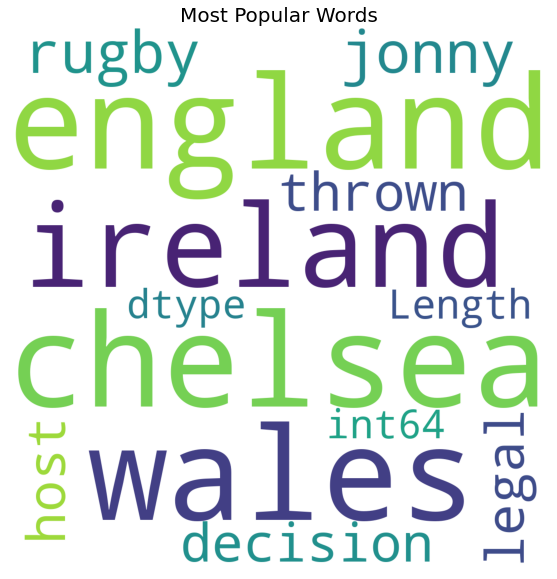

In [40]:
# WordCloud using keywords
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200).generate(str(full_list.value_counts()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

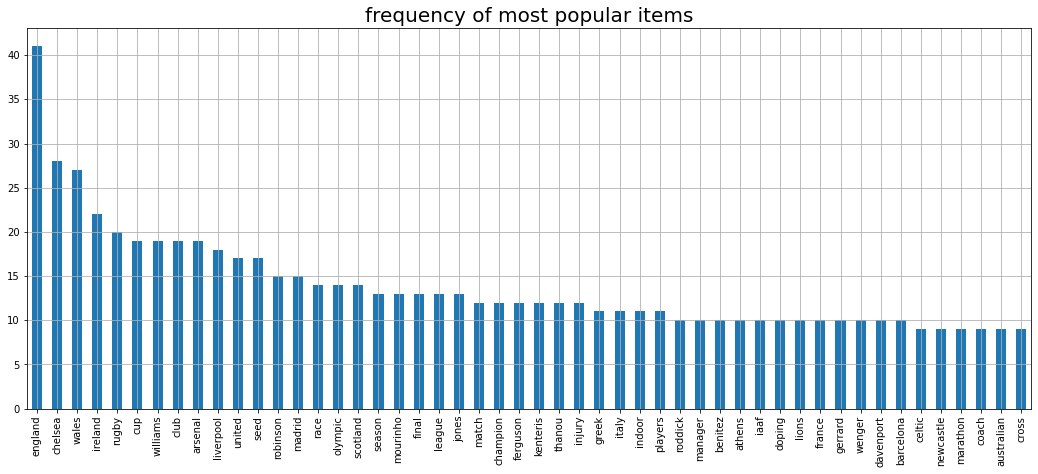

In [41]:
# looking at the frequency of most popular keywords 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [42]:
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded = data_encoded.loc[:, y.index]
data_encoded

,england,chelsea,wales,ireland,rugby,cup,williams,club,arsenal,liverpool,...,gerrard,wenger,davenport,barcelona,celtic,newcastle,marathon,coach,australian,cross
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
509,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
frequent_itemsets=apriori(data_encoded, min_support = 0.001, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.080235,(england)
1,0.054795,(chelsea)
2,0.052838,(wales)
3,0.043053,(ireland)
4,0.039139,(rugby)
...,...,...
353,0.001957,"(athens, iaaf, thanou, kenteris)"
354,0.001957,"(iaaf, thanou, kenteris, doping)"
355,0.003914,"(iaaf, greek, kenteris, doping)"
356,0.001957,"(iaaf, thanou, greek, doping)"


<AxesSubplot:>

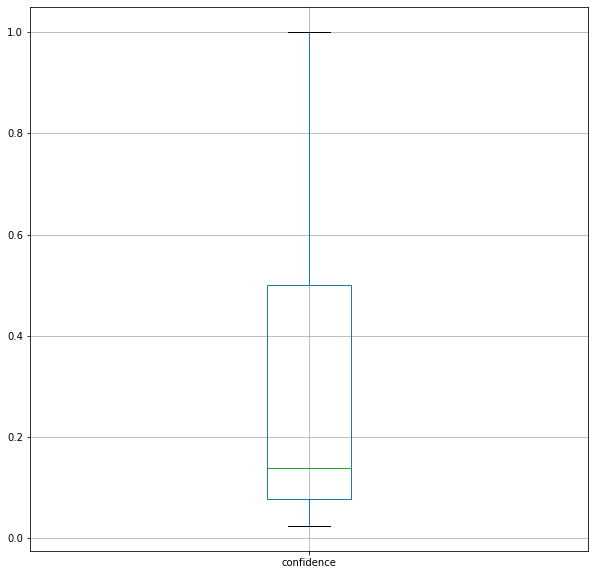

In [44]:
# confidence method
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c[['confidence']].boxplot()

<AxesSubplot:>

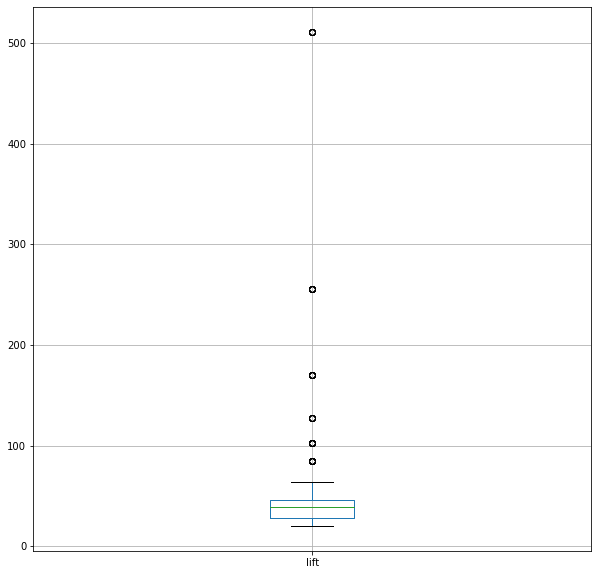

In [45]:
#Lift method
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=20)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l[['lift']].boxplot()

In [46]:
rules_l[ (rules_l['lift'] >= 500) &
       (rules_l['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
397,"(champion, indoor)","(season, olympic)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf
396,"(season, olympic)","(champion, indoor)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf
385,"(champion, marathon)","(olympic, race)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf
370,"(gerrard, league)","(season, liverpool)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf
371,"(season, liverpool)","(gerrard, league)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf
382,"(olympic, race)","(champion, marathon)",0.001957,0.001957,0.001957,1.0,511.0,0.001953,inf


### 2.2.3 Politics

In [47]:
politics_dat = dat[dat['category']=='politics']
politics_dat2 = politics_dat.drop(['category', 'text', 'cleansed_text'], axis = 1)
politics_dat2 = politics_dat2.keywords.apply(pd.Series)

trans = []
for i in range(0, len(politics_dat2)):
    trans.append([str(politics_dat2.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

print(trans)

[['howard' 'party' 'labour' 'election' 'michael']
 ['parliament' 'election' 'blair' 'april' 'name']
 ['hague' 'ambition' 'party' 'front' 'bench']
 ...
 ['pupils' 'survey' 'little' 'questioned' 'dems']
 ['kilroy' 'asylum' 'silk' 'veritas' 'britain']
 ['prisoners' 'arms' 'argument' 'incentives' 'word']]


In [48]:
full_list=pd.Series([])
for col in politics_dat2:
    full_list = full_list.append(politics_dat2[col].dropna())
y = full_list.value_counts().head(50).to_frame()
y.index

<ipython-input-48-e4f985185cfc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


Index(['labour', 'blair', 'election', 'brown', 'party', 'howard', 'chancellor',
       'tax', 'lord', 'police', 'kennedy', 'bill', 'prime', 'tory', 'lib',
       'eu', 'blunkett', 'asylum', 'ukip', 'committee', 'clarke', 'lords',
       'immigration', 'straw', 'terror', 'vote', 'kilroy', 'campaign',
       'minister', 'taxes', 'mps', 'scottish', 'silk', 'children', 'tories',
       'hunting', 'council', 'referendum', 'cuts', 'britain', 'parties',
       'budget', 'unions', 'workers', 'law', 'education', 'local', 'prescott',
       'pension', 'commission'],
      dtype='object')

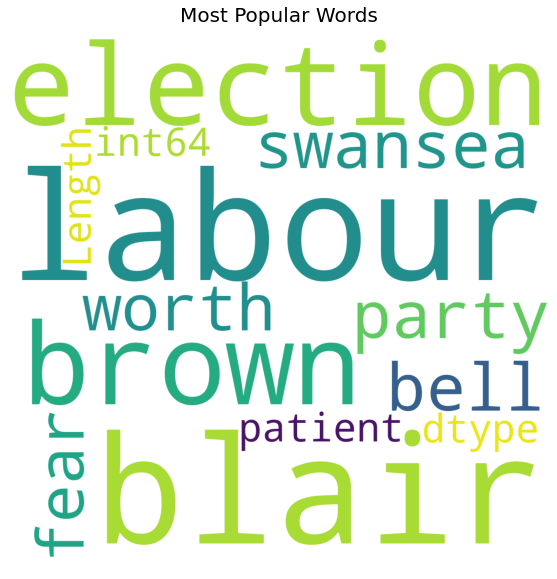

In [49]:
# WordCloud using keywords
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200).generate(str(full_list.value_counts()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

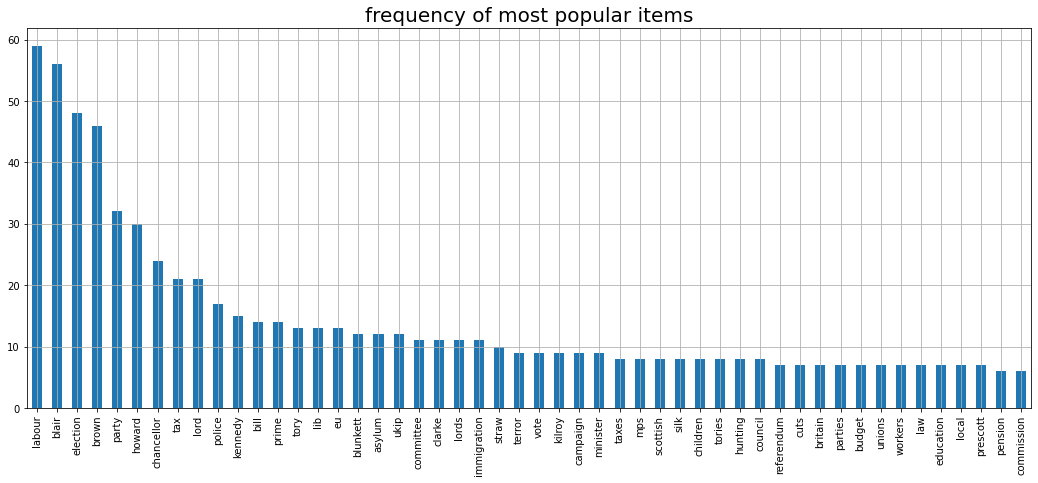

In [50]:
# looking at the frequency of most popular keywords 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [51]:
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded = data_encoded.loc[:, y.index]
data_encoded

,labour,blair,election,brown,party,howard,chancellor,tax,lord,police,...,parties,budget,unions,workers,law,education,local,prescott,pension,commission
0,True,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
413,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
frequent_itemsets=apriori(data_encoded, min_support = 0.01, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.141487,(labour)
1,0.134293,(blair)
2,0.115108,(election)
3,0.110312,(brown)
4,0.076739,(party)
...,...,...
99,0.011990,"(election, brown, budget)"
100,0.014388,"(brown, minister, prime)"
101,0.011990,"(silk, party, kilroy)"
102,0.014388,"(ukip, silk, kilroy)"


<AxesSubplot:>

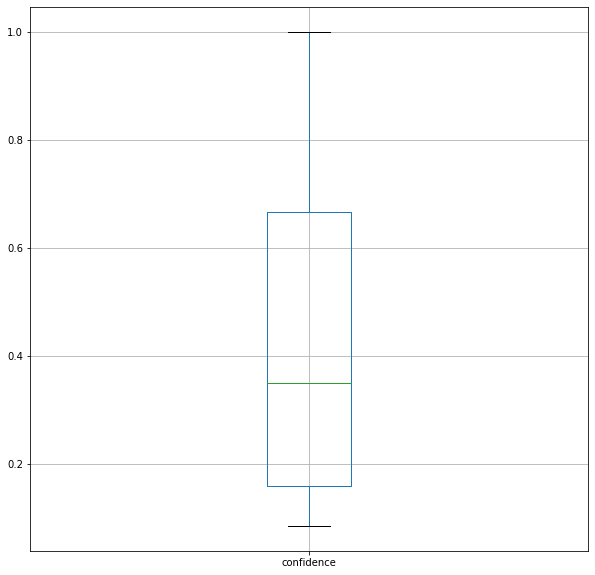

In [53]:
# confidence method
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c[['confidence']].boxplot()

<AxesSubplot:>

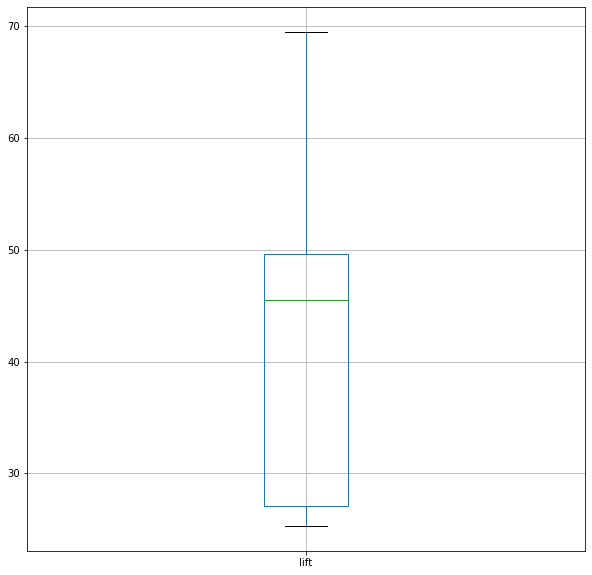

In [54]:
#Lift method
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=20)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l[['lift']].boxplot()

In [55]:
rules_l[ (rules_l['lift'] >= 40) &
       (rules_l['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,"(workers, unions)",(pension),0.011990,0.014388,0.011990,1.0,69.500000,0.011818,inf
32,"(unions, pension)",(workers),0.011990,0.016787,0.011990,1.0,59.571429,0.011789,inf
31,"(workers, pension)",(unions),0.011990,0.016787,0.011990,1.0,59.571429,0.011789,inf
21,"(party, kilroy)",(silk),0.011990,0.019185,0.011990,1.0,52.125000,0.011760,inf
8,(silk),(kilroy),0.019185,0.021583,0.019185,1.0,46.333333,0.018771,inf
24,"(ukip, silk)",(kilroy),0.014388,0.021583,0.014388,1.0,46.333333,0.014078,inf
20,"(silk, party)",(kilroy),0.011990,0.021583,0.011990,1.0,46.333333,0.011732,inf


### 2.2.4 Entertainment

In [56]:
entertainment_dat = dat[dat['category']=='entertainment']
entertainment_dat2 = entertainment_dat.drop(['category', 'text', 'cleansed_text'], axis = 1)
entertainment_dat2 = entertainment_dat2.keywords.apply(pd.Series)

trans = []
for i in range(0, len(entertainment_dat2)):
    trans.append([str(entertainment_dat2.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

print(trans)

[['ocean' 'sequel' 'twelve' 'starring' 'box']
 ['wars' 'lucas' 'rating' 'film' 'star']
 ['film' 'nazi' 'berlin' 'festival' 'distributing']
 ...
 ['lopez' 'cancelled' 'film' 'premiere' 'dancing']
 ['tsunami' 'tv' 'money' 'night' 'performances']
 ['glasgow' 'concert' 'gig' 'tickets' 'june']]


In [57]:
full_list=pd.Series([])
for col in entertainment_dat2:
    full_list = full_list.append(entertainment_dat2[col].dropna())
y = full_list.value_counts().head(50).to_frame()
y.index

<ipython-input-57-7a9280a5a94c>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


Index(['film', 'band', 'album', 'festival', 'awards', 'music', 'oscar',
       'award', 'chart', 'singer', 'films', 'box', 'musical', 'song', 'actor',
       'book', 'actress', 'theatre', 'tv', 'elvis', 'rock', 'oscars', 'berlin',
       'singles', 'aviator', 'comedy', 'prize', 'concert', 'ray', 'star',
       'series', 'starring', 'christmas', 'nominated', 'nominations', 'single',
       'jackson', 'children', 'tour', 'dvd', 'favourite', 'lee', 'list', 'sir',
       'winner', 'foxx', 'rapper', 'nominees', 'brother', 'presley'],
      dtype='object')

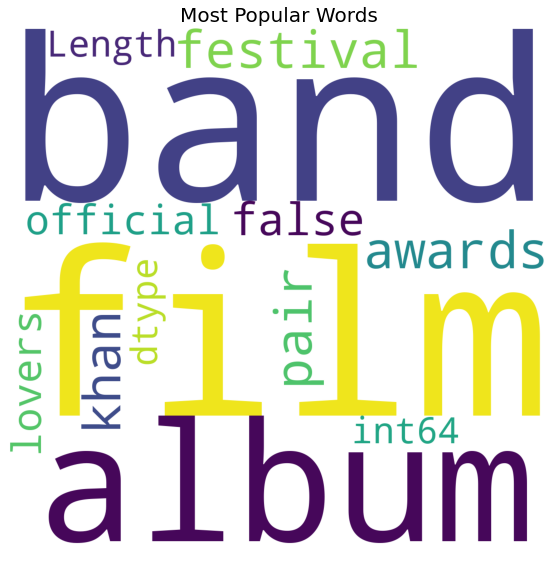

In [58]:
# WordCloud using keywords
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200).generate(str(full_list.value_counts()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

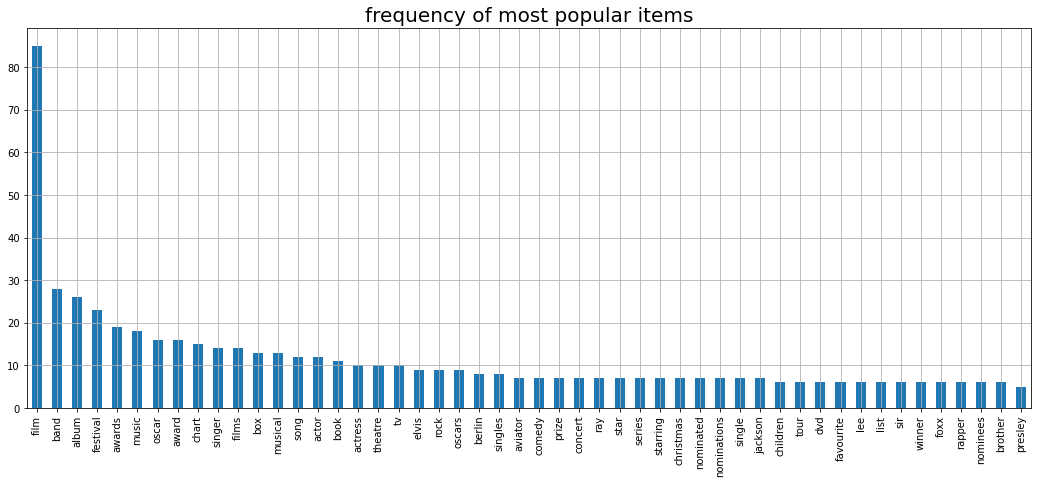

In [59]:
# looking at the frequency of most popular keywords 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [60]:
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded = data_encoded.loc[:, y.index]
data_encoded

,film,band,album,festival,awards,music,oscar,award,chart,singer,...,favourite,lee,list,sir,winner,foxx,rapper,nominees,brother,presley
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
382,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
383,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
frequent_itemsets=apriori(data_encoded, min_support = 0.001, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.220207,(film)
1,0.072539,(band)
2,0.067358,(album)
3,0.059585,(festival)
4,0.049223,(awards)
...,...,...
376,0.002591,"(nominees, foxx, oscar, oscars)"
377,0.002591,"(chart, song, elvis, singles)"
378,0.002591,"(presley, chart, single, elvis)"
379,0.002591,"(oscars, awards, film, rock, films)"


<AxesSubplot:>

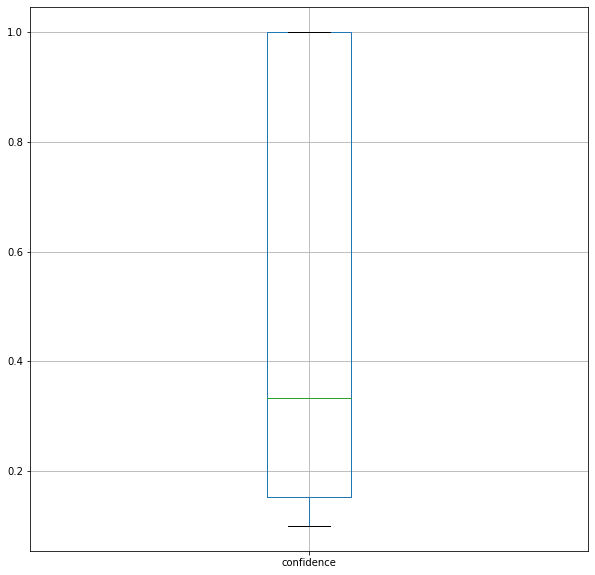

In [62]:
# confidence method
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c[['confidence']].boxplot()

<AxesSubplot:>

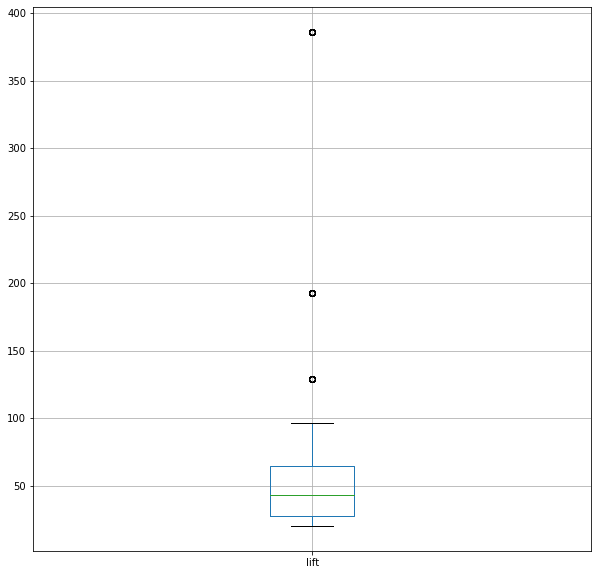

In [63]:
#Lift method
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=20)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l[['lift']].boxplot()

In [64]:
rules_l[ (rules_l['lift'] >= 350) &
       (rules_l['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
508,"(oscars, rock)","(awards, films)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
424,"(rock, film)","(oscars, films)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
507,"(oscars, films)","(awards, rock)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
601,"(oscars, film)","(awards, films, rock)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
609,"(films, rock)","(oscars, awards, film)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
340,"(rock, film)","(awards, films)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
362,"(awards, rock)","(oscars, film)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
602,"(oscars, rock)","(awards, films, film)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
603,"(oscars, films)","(awards, rock, film)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf
605,"(awards, rock)","(oscars, films, film)",0.002591,0.002591,0.002591,1.0,386.0,0.002584,inf


### 2.2.5 Business

In [65]:
business_dat = dat[dat['category']=='business']
business_dat2 = business_dat.drop(['category', 'text', 'cleansed_text'], axis = 1)
business_dat2 = business_dat2.keywords.apply(pd.Series)

trans = []
for i in range(0, len(business_dat2)):
    trans.append([str(business_dat2.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

print(trans)

[['worldcom' 'ebbers' 'accounting' 'fraud' 'defence']
 ['virgin' 'blue' 'profits' 'airline' 'shares']
 ['prices' 'crude' 'oil' 'barrel' 'opec']
 ...
 ['bush' 'budget' 'spending' 'bn' 'trillion']
 ['car' 'beijing' 'fees' 'indoor' 'outdoor']
 ['sales' 'retail' 'stores' 'car' 'rose']]


In [66]:
full_list=pd.Series([])
for col in business_dat2:
    full_list = full_list.append(business_dat2[col].dropna())
y = full_list.value_counts().head(50).to_frame()
y.index

<ipython-input-66-0a9b4ebb76a1>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full_list=pd.Series([])


Index(['bn', 'economy', 'bank', 'sales', 'growth', 'oil', 'shares', 'yukos',
       'profits', 'india', 'prices', 'euros', 'economic', 'china', 'dollar',
       'quarter', 'stock', 'eu', 'deficit', 'japan', 'russian', 'spending',
       'deutsche', 'fraud', 'car', 'club', 'rate', 'budget', 'euro',
       'consumer', 'airline', 'stake', 'gm', 'insurance', 'worldcom', 'boerse',
       'bankruptcy', 'bid', 'index', 'profit', 'creditors', 'court', 'deal',
       'exports', 'sec', 'jobs', 'yugansk', 'lse', 'rates', 'japanese'],
      dtype='object')

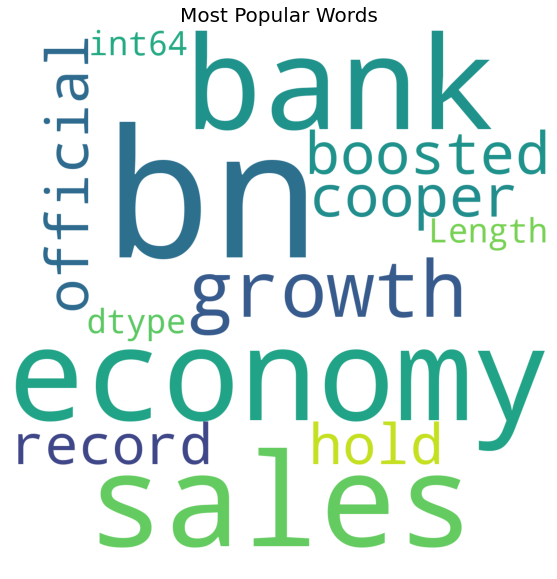

In [67]:
# WordCloud using keywords
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200).generate(str(full_list.value_counts()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

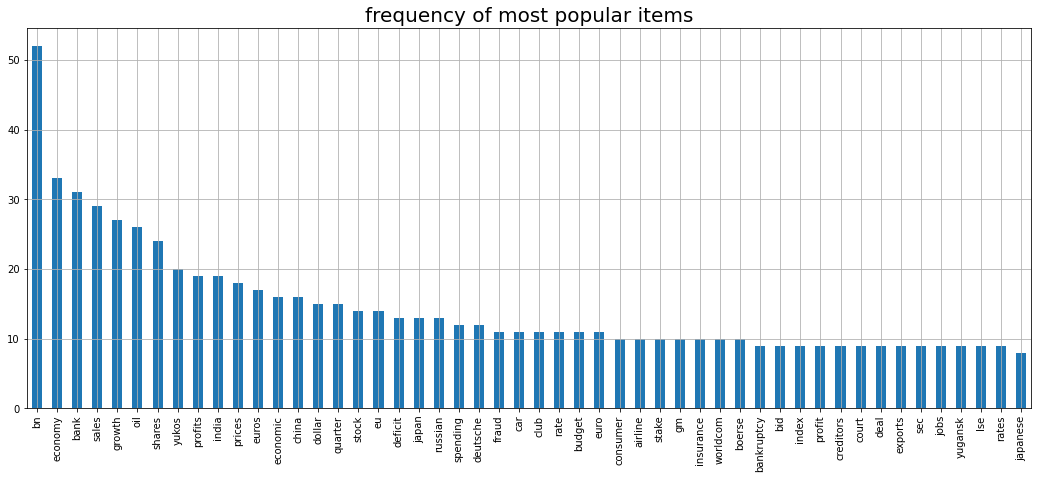

In [68]:
# looking at the frequency of most popular keywords 
plt.figure(figsize=(18,7))
full_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [69]:
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded = data_encoded.loc[:, y.index]
data_encoded

,bn,economy,bank,sales,growth,oil,shares,yukos,profits,india,...,creditors,court,deal,exports,sec,jobs,yugansk,lse,rates,japanese
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
506,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
507,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
frequent_itemsets=apriori(data_encoded, min_support = 0.001, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.101961,(bn)
1,0.064706,(economy)
2,0.060784,(bank)
3,0.056863,(sales)
4,0.052941,(growth)
...,...,...
439,0.001961,"(stock, euros, deutsche, boerse)"
440,0.001961,"(quarter, spending, rate, consumer)"
441,0.003922,"(lse, deutsche, boerse, bid)"
442,0.001961,"(court, bank, yukos, yugansk, russian)"


<AxesSubplot:>

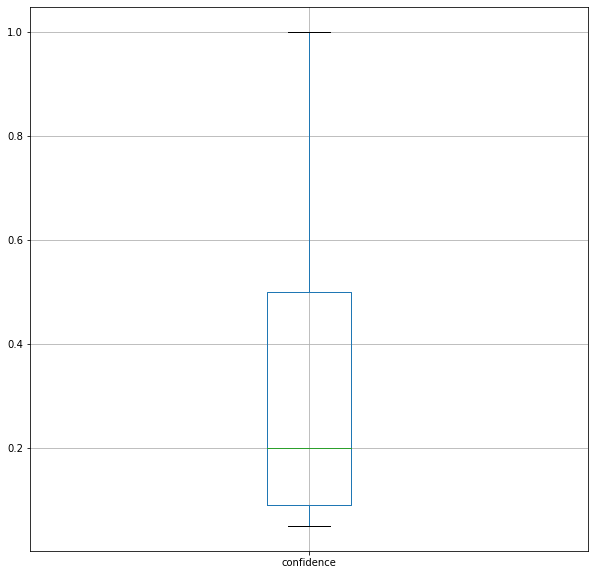

In [71]:
# confidence method
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c[['confidence']].boxplot()

<AxesSubplot:>

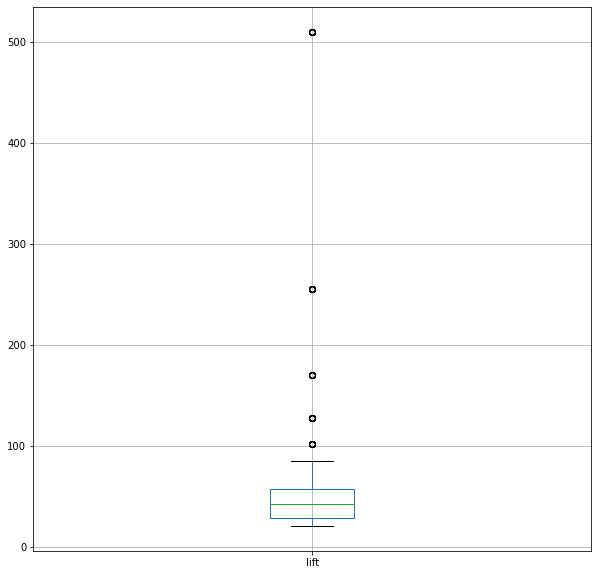

In [72]:
#Lift method
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=20)
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l[['lift']].boxplot()

In [73]:
rules_l[ (rules_l['lift'] >= 500) &
       (rules_l['confidence'] >= 1) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
464,"(deutsche, yukos)","(bank, bankruptcy)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
649,"(rate, consumer)","(quarter, spending)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
402,"(stake, bn)","(euros, gm)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
631,"(stock, deutsche)","(euros, boerse)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
498,"(euro, economic)","(deficit, growth)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
618,"(spending, rates)","(prices, consumer)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
644,"(quarter, spending)","(rate, consumer)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
646,"(quarter, consumer)","(spending, rate)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
710,"(quarter, spending)","(rate, consumer, growth)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf
647,"(spending, rate)","(quarter, consumer)",0.001961,0.001961,0.001961,1.0,510.0,0.001957,inf


## 3. Classification Modeling

### 3.1 Sample the data

#### 3.1.1 Use Word Counts as model input

In [74]:
X = text_counts.toarray()  # 
y = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

#### 3.1.2 Use TF-IDF matrix as model input

In [75]:
X2 = text_tfidf.toarray()
y2 = dat['category'].map( {'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4} ).astype(int)

### 3.2 Build the Model(s)

#### 3.2.1 Use Word Counts as model input

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 3.2.2 Use TF-IDF matrix as model input

In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2)

### 3.3 Evaluate and Improve the Model(s)

### Logistic Regression

In [78]:
sorted(LogisticRegression().get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

#### 3.3.1 Use Word Counts as model input

In [79]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X_train, y_train, cv=20) #Higher cv higher accuracy
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.971


In [80]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=20) #Higher cv higher score
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.972
Best parameters:  {'C': 10}


In [81]:
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Test score: 0.982


#### 3.3.2 Use TF-IDF matrix as model input

In [82]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter=1000), X2_train, y2_train, cv=20)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.974


In [83]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), param_grid, cv=20) 
grid.fit(X2_train, y2_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.974
Best parameters:  {'C': 10}


In [84]:
print("Test score: {:.3f}".format(grid.score(X2_test, y2_test)))

Test score: 0.981


### Decision Tree

In [85]:
sorted(tree.DecisionTreeClassifier().get_params().keys())

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

#### 3.3.3 Use Word Counts as model input

In [86]:
scores = cross_val_score(tree.DecisionTreeClassifier(), X_train, y_train, cv=20)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.843


In [87]:
param_grid = {'ccp_alpha':[0.00001,0.0001, 0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=20)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.845
Best parameters:  {'ccp_alpha': 0.001}


In [88]:
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Test score: 0.850


#### 3.3.4 Use TF-IDF matrix as model input

In [89]:
scores = cross_val_score(tree.DecisionTreeClassifier(), X2_train, y2_train, cv=20)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.848


In [90]:
param_grid = {'ccp_alpha':[0.00001,0.0001, 0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=20)
grid.fit(X2_train, y2_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.844
Best parameters:  {'ccp_alpha': 1e-05}


In [91]:
print("Test score: {:.3f}".format(grid.score(X2_test, y2_test)))

Test score: 0.856


### Random Forest Classifier


In [92]:
sorted(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

#### 3.3.5 Use Word Counts as model input

In [101]:
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=20)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.954


In [102]:
param_grid = {'bootstrap':[0.0001, 0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=20)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.961
Best parameters:  {'bootstrap': 0.1}


In [103]:
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Test score: 0.975


#### 3.3.6 Use TF-IDF matrix as model input

In [104]:
scores = cross_val_score(RandomForestClassifier(), X2_train, y2_train, cv=20)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.962


In [105]:
param_grid = {'bootstrap':[0.0001, 0.001,0.01, 0.1, 1, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=20)
grid.fit(X2_train, y2_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.962
Best parameters:  {'bootstrap': 0.1}


In [106]:
print("Test score: {:.3f}".format(grid.score(X2_test, y2_test)))

Test score: 0.963
